<a href="https://colab.research.google.com/github/Danielewicz-code/Stroke-prediction-LogisticRegretion/blob/main/Stroke_Prediction_LogisticPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

in this proyect i will be trying to be as extensive as posible, my goal is not only have a good model which can make good predictions, apart of that i´ll be making an extense proyect exploring each pice of data, this dataset will be exploring if a person is likely to have a stroke, with nothing more to say, let´s start

In [280]:
#recolection fo the data
df = pd.read_csv('stroke_data.csv')

print('stroke dataset has {} data points with {} columns'.format(*df.shape))

stroke dataset has 5110 data points with 12 columns


In [296]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,married,work,Recidence,smoking
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,2,1,1
1,0.786070,0,0,2.121559,4.615554e-16,1,0,1,3,0,2
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,1,2,0,2
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,2,1,3
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,1,3,0,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [52]:
#check missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

for what i see we have a really clean dataset, we have to convert many objects and maybe level the bmi or delete it, we´ll se.

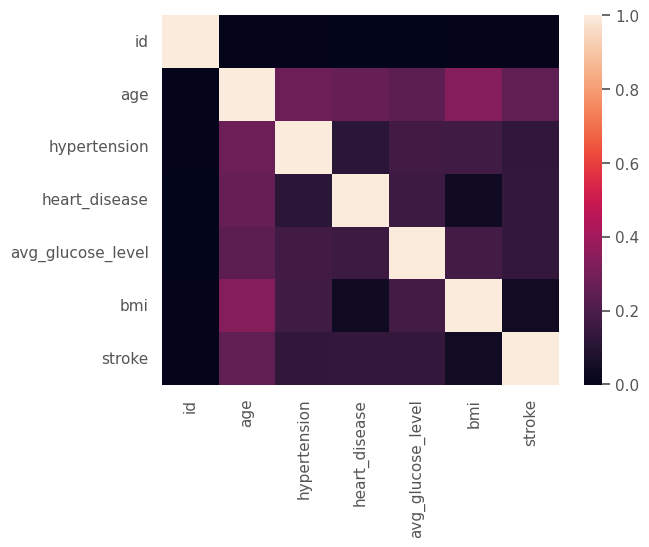

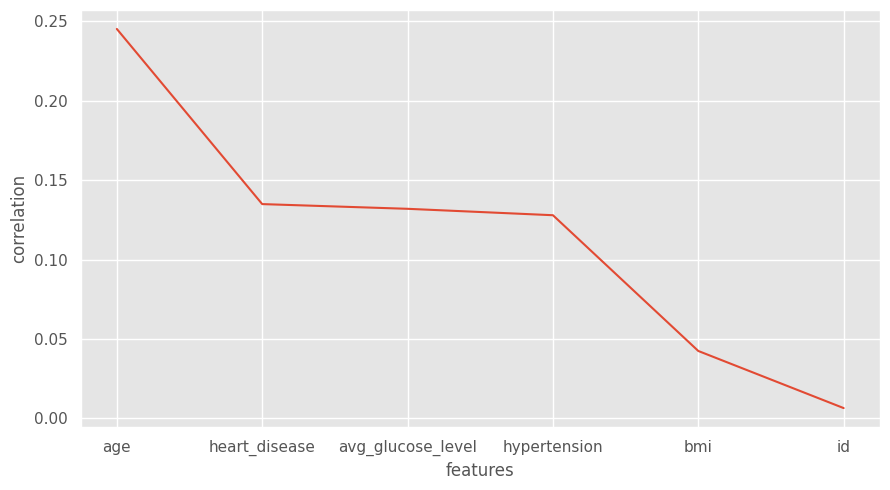

In [53]:
#correlation matrix
corr = df.corr(numeric_only= True)

sns.heatmap(corr)

#let´s see if all the values are significant within each other

#size
plt.figure(figsize= (9, 5))
#we are using stroke as principal feature and puting it in decendent order, excluiding strike of course
plt.plot(corr['stroke'].sort_values(ascending= False)[1:], label= 'correlation')
plt.ylabel('correlation')
plt.xlabel('features')
#square grid
plt.grid(True)
#do the margins and good distribution
plt.tight_layout()
plt.show()

here we can see come courious things. the id is as expected not that necesary but the interesting thing is the small correlation between bmi and the strokes, maybe i´ll erease it, lets keep seeing the dataset

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


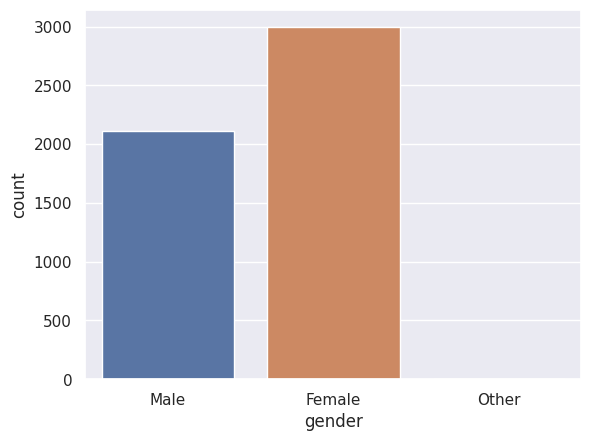

In [54]:
#gender
print(df.gender.value_counts())

#choose the grids style
sns.set_theme(style= 'darkgrid')

#make a countplot grafic, we pass the data and then the feature 'x', the one we choose
ax = sns.countplot(data= df, x= 'gender')

#show the graphic
plt.show()

we can se there is about 1000 females more than male

0    4612
1     498
Name: hypertension, dtype: int64


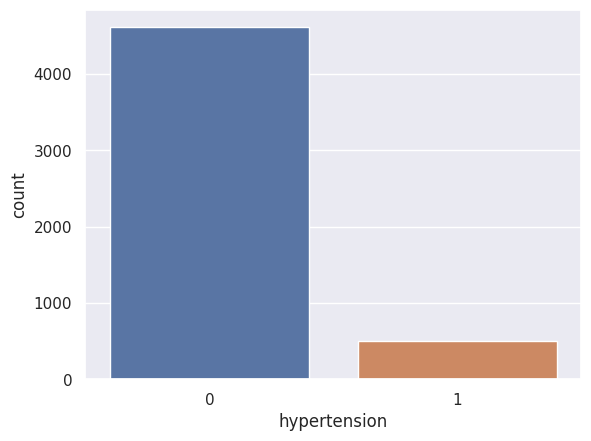

In [55]:
#here we are gonna see the shape of the hypertension feature
print(df.hypertension.value_counts())

#here we are gonna do the graphics
sns.set_theme(style= 'darkgrid')

#we make the countplot graphic
ax= sns.countplot(data= df, x= 'hypertension')

plt.show()

we can see most people do not have hypertension

Yes    3353
No     1757
Name: ever_married, dtype: int64


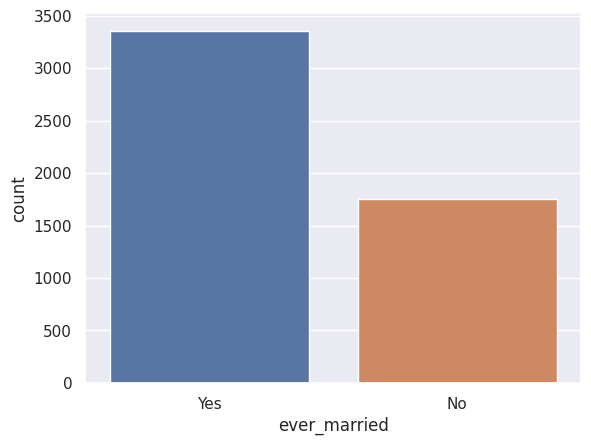

In [56]:
#mariage

print(df.ever_married.value_counts())

sns.set_theme(style= 'darkgrid')

ax = sns.countplot(data= df, x= 'ever_married')

plt.show()

we can see that there is almost the duble of married people in de dataset

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


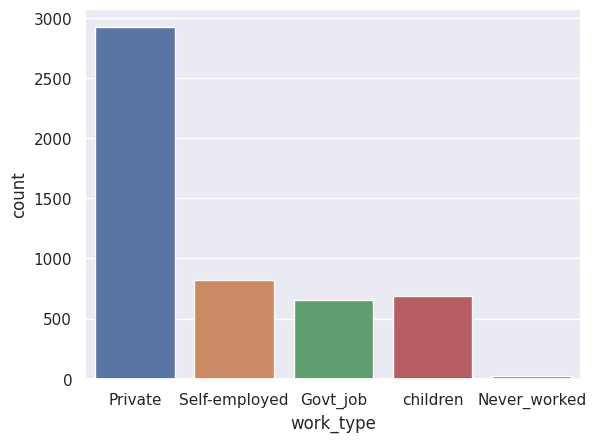

In [57]:
#work type

print(df.work_type.value_counts())

sns.set_theme(style= 'darkgrid')

ax = sns.countplot(data= df, x= 'work_type')

plt.show()

here we can see the spectrum of works types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


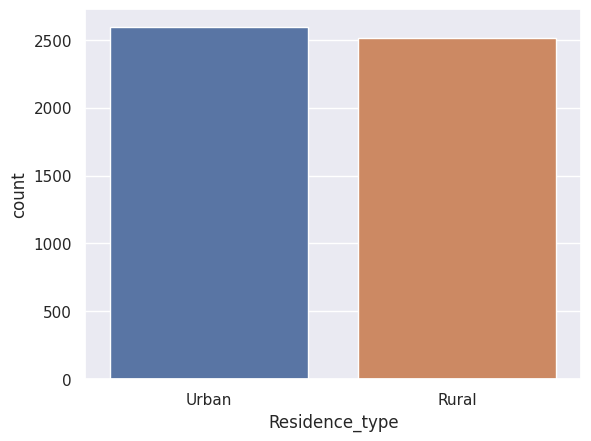

In [58]:
#Residence type

print(df.Residence_type.value_counts())

sns.set_theme(style= 'darkgrid')

ax = sns.countplot(data= df, x= 'Residence_type')

plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


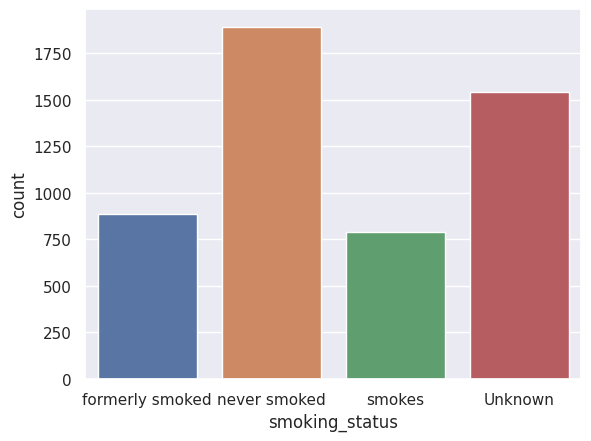

In [59]:
# smoking status
print(df.smoking_status.value_counts())

sns.set_theme(style= 'darkgrid')

ax= sns.countplot(data= df, x= 'smoking_status')

plt.show()

we can seethat most people never smoked

0    4861
1     249
Name: stroke, dtype: int64


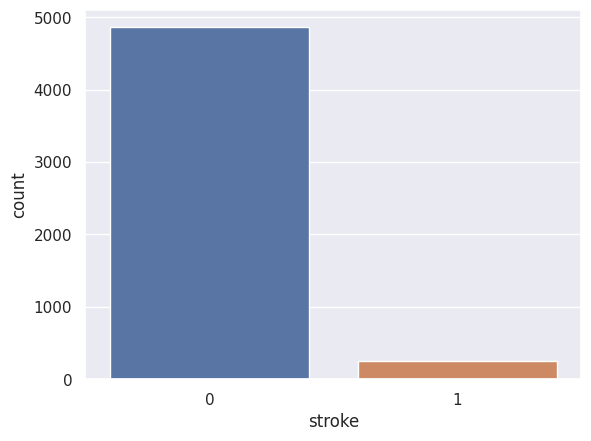

In [60]:
#strokes

print(df.stroke.value_counts())

sns.set_theme(style= 'darkgrid')

ax = sns.countplot(data= df, x= 'stroke')

plt.show()

**we can say most of them didnt have a stroke this is super important, we may use something called 'SMOTE', remember it**

Distribution plot

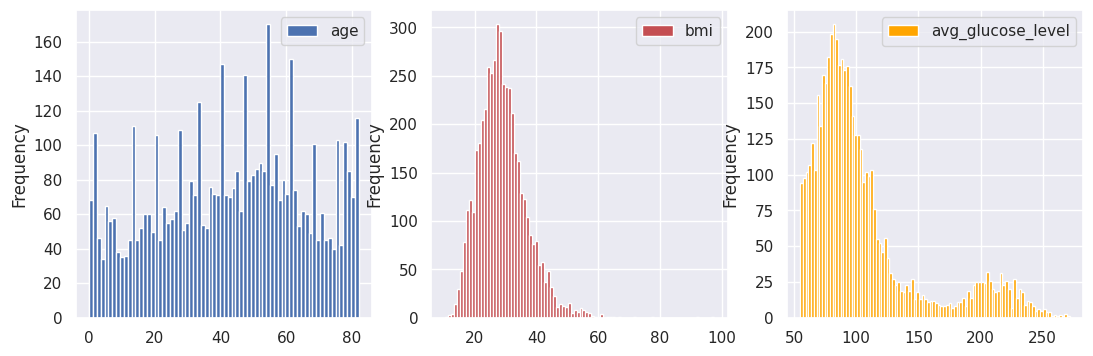

In [61]:
#we make the fig size and create subplots
#what we are doing here is doing the fig size and doing the axes for each subplot
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize= (13, 4))

#we pass the info we want to see
df.plot(kind= 'hist', y= 'age',bins= 70, color= 'b', ax= axes[0])

df.plot(kind= 'hist', y= 'bmi', bins= 90, color= 'r', ax= axes[1])

df.plot(kind= 'hist', y= 'avg_glucose_level', bins= 100, color= 'orange', ax= axes[2])

plt.show()

here we can see different types of features. first of all, we can see:

AGE: great variation in age.

BMI: in the bmi section, we can see most people are overweigth or obese so i think it may be a valuable feature, maybe taking the mean and normalizing the values.

Glucose level: here we can see most people have the glucose in normal rates, that means it may not be helpfull to the model.

<ipython-input-62-45e89a9a2b7d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['stroke'] == 1) & (df['bmi'] <= 24)]['bmi'], color= 'green', label= 'stroke low bmi')
<ipython-input-62-45e89a9a2b7d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['stroke'] == 1) & (df['bmi'] >= 24

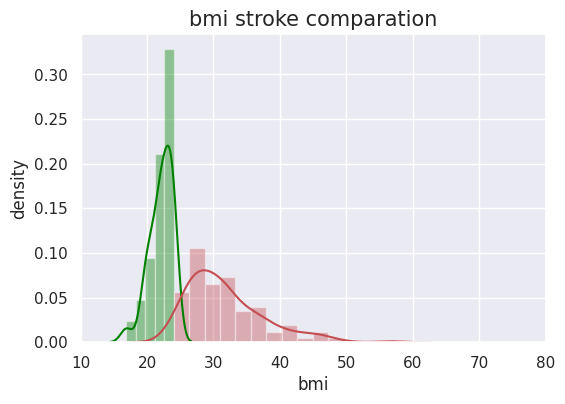

In [62]:
#Stroke with overweigth vs normal stroke

plt.figure(figsize= (6,4))

#low bmi
sns.distplot(df[(df['stroke'] == 1) & (df['bmi'] <= 24)]['bmi'], color= 'green', label= 'stroke low bmi')

#high bmi
sns.distplot(df[(df['stroke'] == 1) & (df['bmi'] >= 24)]['bmi'], color= 'r', label= 'stroke high bmi')

plt.title('bmi stroke comparation', fontsize= 15)
plt.xlim([10, 80])
plt.xlabel('bmi')
plt.ylabel('density')
plt.show()

we can see in the bmi stroke comparation that most people had a stroke being in normal weigth. This could be resul of the lack of a complete dataset.

<ipython-input-63-952692040083>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['stroke']== 1]['age'], color= 'r', label= 'stroke')
<ipython-input-63-952692040083>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['stroke']== 0]['age'], color= 'green', label= 'non-stroke')


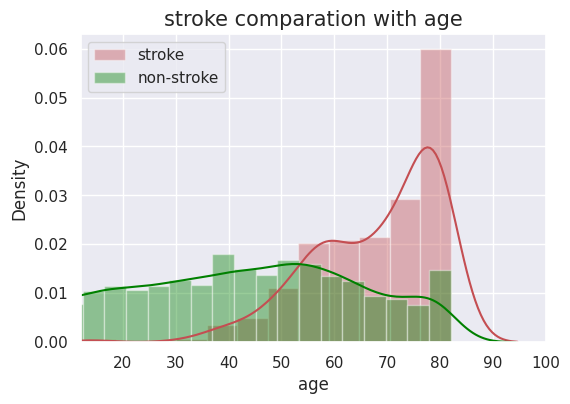

In [63]:
#stroke comparation with the age

plt.figure(figsize= (6, 4))

#stroke
sns.distplot(df[df['stroke']== 1]['age'], color= 'r', label= 'stroke')
#no stroke
sns.distplot(df[df['stroke']== 0]['age'], color= 'green', label= 'non-stroke')

plt.title('stroke comparation with age', fontsize= 15)
plt.xlim([12, 100])
plt.legend()
plt.show()

What we can see is that individuals above 50 y/o have a higher likelihood of experiencing stroke´s

# **Now we can aplay the changes we need to have a clean dataset**

In [281]:
#make a mean value
mean_bmi = df['bmi'].mean()

#put the main values to fill the bmi data
df['bmi'].fillna(value=mean_bmi, inplace= True)

print(f'here is the "bmi" missing values value now: {df["bmi"].isnull().sum()}')

here is the "bmi" missing values value now: 0


In [282]:
#initialize scaler standar, this is for the float values

scaler= StandardScaler()

numeric_values= ['age', 'avg_glucose_level', 'bmi']

df[numeric_values] = scaler.fit_transform(df[numeric_values])

In [283]:
#Label encoding non numeric values

encoding= preprocessing.LabelEncoder()

df['Sex'] = encoding.fit_transform(df['gender'])
df['married'] = encoding.fit_transform(df['ever_married'])
df['work'] = encoding.fit_transform(df['work_type'])
df['Recidence'] = encoding.fit_transform(df['Residence_type'])
df['smoking'] = encoding.fit_transform(df['smoking_status'])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,married,work,Recidence,smoking
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001234e+00,formerly smoked,1,1,1,2,1,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,4.615554e-16,never smoked,1,0,1,3,0,2
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,4.685773e-01,never smoked,1,1,1,2,0,2
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,7.154182e-01,smokes,1,0,1,2,1,3
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-6.357112e-01,never smoked,1,0,1,3,0,2


In [284]:
#delete useless data

df = df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis= 1)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   int64  
 7   Sex                5110 non-null   int64  
 8   married            5110 non-null   int64  
 9   work               5110 non-null   int64  
 10  Recidence          5110 non-null   int64  
 11  smoking            5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [262]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Sex,married,work,Recidence,smoking
count,5110.000000,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,5.005781e-17,0.097456,0.054012,1.001156e-16,2.224791e-17,0.048728,0.414286,0.656164,2.167710,0.508023,1.376908
std,21161.721625,1.000098e+00,0.296607,0.226063,1.000098e+00,1.000098e+00,0.215320,0.493044,0.475034,1.090293,0.499985,1.071534
min,67.000000,-1.908261e+00,0.000000,0.000000,-1.126958e+00,-2.415564e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,-8.061152e-01,0.000000,0.000000,-6.383223e-01,-6.616944e-01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,36932.000000,7.843218e-02,0.000000,0.000000,-3.149945e-01,-6.407951e-02,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
75%,54682.000000,7.860701e-01,0.000000,0.000000,1.754080e-01,5.075521e-01,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000
max,72940.000000,1.714845e+00,1.000000,1.000000,3.657145e+00,8.926127e+00,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000


In [286]:
#with inplace we can apply the changes without doing a new variabe

#here we drop id wich is irrelevant
df.drop('id', axis= 1, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   Sex                5110 non-null   int64  
 7   married            5110 non-null   int64  
 8   work               5110 non-null   int64  
 9   Recidence          5110 non-null   int64  
 10  smoking            5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [264]:
#review the shape
df.shape

(5110, 11)

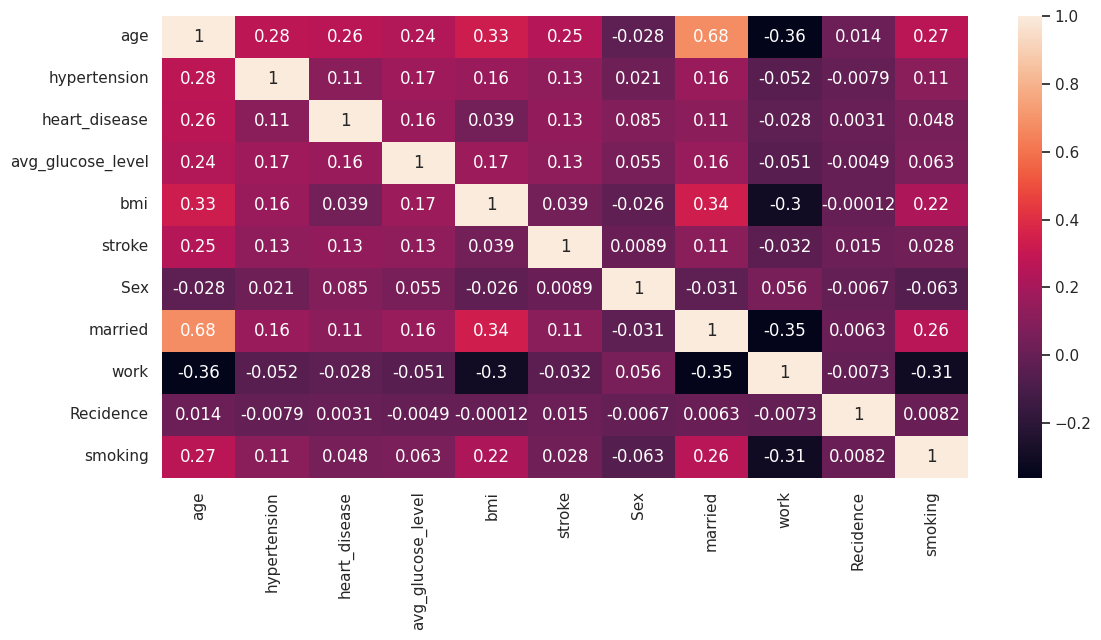

In [265]:
#final correlation matrix to see the final values
plt.figure(figsize= (13, 6))

corr = df.corr()

sns.heatmap(corr, annot= True)

plt.show()

## **Create de ML model**

In [287]:
#bring the data
X = df.drop('stroke', axis= 1)

Y = df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.4,stratify= Y, random_state= 69)

print('succesful data transfer')

succesful data transfer


In [288]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', Y_train.shape)
print('y_test: ', Y_test.shape)

x_train:  (3066, 10)
x_test:  (2044, 10)
y_train:  (3066,)
y_test:  (2044,)


**Now we have a problem we need to fix, the non-stroke values are more, so we are gona use something called 'SMOTE' wich will make the model learn more about the stroke data and level up that info so it will be balanced.**

In [289]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 69)

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train )

In [290]:
#making the model
model= LogisticRegression(max_iter= 100)

model.fit(X_train_smote, Y_train_smote)

LogisticRegression()

In [291]:
#here we train the model and have some metrics of accurancy
model_score = model.score(X_train_smote, Y_train_smote)
model_test = model.score(X_test, Y_test)


X_pred = model.predict(X_test)

#this is a confusion matrix, basically this thing let us see false positives and false negatives examples
cm= confusion_matrix(Y_test, X_pred)


print(f'this is the prediction model: {model_test}')
print(f'this is the score of the model: {model_score}')
print('this is the confucion matrix:')
print(cm)

this is the prediction model: 0.7490215264187867
this is the score of the model: 0.7694549194377786
this is the confucion matrix:
[[1451  493]
 [  20   80]]


**stroke: 1 if the patient had a stroke or 0 if not**

In [298]:
index = 74


test = X_test.iloc[index]

pred = model.predict([test])

actual_label = Y_test.iloc[index]

accuracy = accuracy_score([actual_label], pred)

print(f'The test index {index} is: {accuracy}')


the test index 74 is: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **View some metrics, i let chatgpt do this one for me**

the good values are top left and bottom right, the other two are false positives

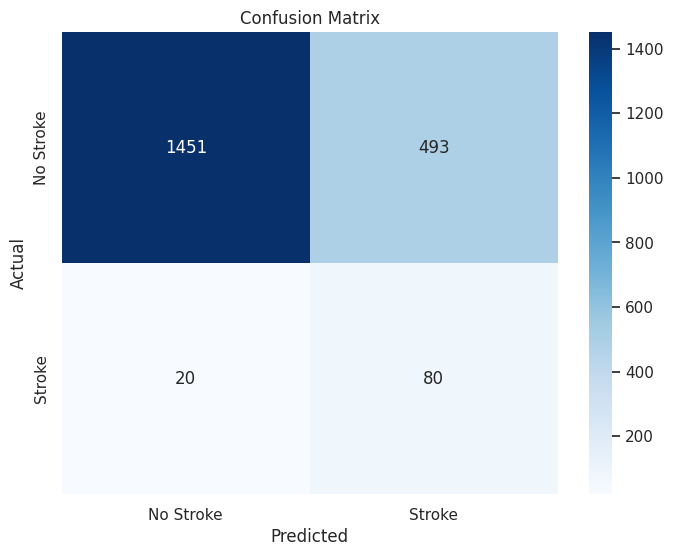

In [295]:
# confusion matrix
confusion = [[1451, 493],
             [20, 80]]

# labels
labels = ['No Stroke', 'Stroke']

# Create the graph
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

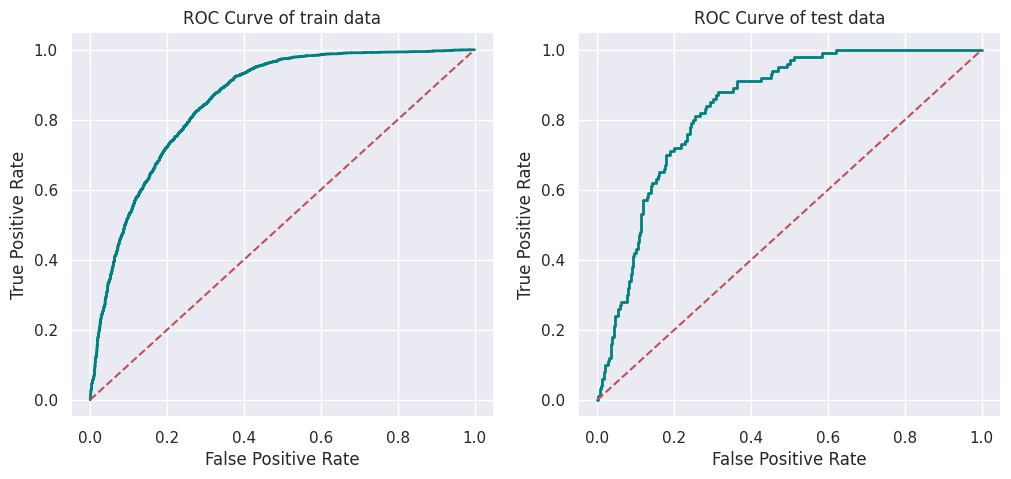

In [294]:
# predict probabilities for both train and test data
y_train_pred_prob = model.predict_proba(X_train_smote)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# calculate ROC curve for train and test data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_smote, y_train_pred_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_test_pred_prob)

# create subplots to display ROC curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot ROC curve for train data
plt.sca(axes[0])
plt.plot(fpr_train, tpr_train, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plot ROC curve for test data
plt.sca(axes[1])
plt.plot(fpr_test, tpr_test, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()

**here we can se the ROC(Receiver Operating Characteristic) that is a metric to see how well our model can perform, top left is the true positive rate, in other words its what we want our model to do, bottom left is the false positive, here we can see a decent performance on the model, not going too far from the true positive rates.**

## Conclusion:


 In this model we saw lots of diferent metrics, too much id say, this was a practice for me to use new things, i wanted to try a "easy" dataset to do this and im really satisfied, my conclusions are these:

1. You don´t need that much graphics, you can see whats going on with only numbers, maybe one necesary graphic will be histogram, corr heatmap, etc, you don´t need to do it for every step.

2. this model was a logistic regretion one, this algorithm is not that powerfull and even tho we got pretty decent results it could be better.

3. this dataset had in my oppinion one big problem, this was de lack of stroke´s data, i mean we had like 4861 non-strokes vs 249 actual stokes, i try my best to balance that number but i think it was a great factor.

4. I really enyoied this proyect, it took me like 8-9 hours or so, to research, debug, ask chatgpt and of course to write code, i had to knew how the bmi worked also the glucose level and more, great experience.